In [284]:
'''Importing pandas library to read csv files and to perform data processing'''
import pandas as pd

'''Importing numpy library to perform operations on multidimensional arrays/matrices (linear algebra)'''
import numpy as np

'''Importing re library to perform regex operations'''
import re

import seaborn as sns

'''Importing set of libraries for natural language processing'''
import nltk

'''Importing stopwords from nltk. Stopwords are the words which are more common in any document and do not add much 
meaning to a sentence and hence are removed while text preprocessing'''
from nltk.corpus import stopwords
stopWord = stopwords.words('english')

from nltk.tokenize import word_tokenize

'''Importing WordNetLemmatizer library from nltk. It follows process of Lemmatization where different inflected forms of 
word are grouped together to be analyzed as single term.''' 
from nltk.stem import WordNetLemmatizer

'''The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature 
vectors into a representation that is more suitable for the downstream estimators.'''
from sklearn import preprocessing

'''Sequentially apply a list of transforms and a final estimator.'''
from sklearn.pipeline import Pipeline

'''Concatenates results of multiple transformer objects.'''
from sklearn.pipeline import FeatureUnion

'''Base class for all estimators in scikit-learn.'''
'''Mixin class for all transformers in scikit-learn.'''
from sklearn.base import BaseEstimator, TransformerMixin

'''Convert a collection of raw documents to a matrix of TF-IDF features.'''
from sklearn.feature_extraction.text import TfidfVectorizer

'''Standardize features by removing the mean and scaling to unit variance.'''
from sklearn.preprocessing import StandardScaler

from wordcloud import WordCloud
import matplotlib.pyplot as plt

'''Supervised ML models'''
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

'''train_test_split is library from sklearn used to split original dataset into two subsets for training and testing data.'''
from sklearn.model_selection import train_test_split

'''Importing accuracy_score module from sklearn.metrics to retrive the accuracy of the classification model'''
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score



In [285]:
tweet = pd.read_csv('/Users/poornankpurohit/Desktop/train.csv')

In [286]:
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [287]:
tweet["tweet"].value_counts()

#model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                      319
i finally found a way how to delete old tweets! you might find it useful as well:    #deletetweets         82
aww yeah it's all good bing bong bing bong                                                                 75
i'm so   and #grateful now that - #affirmations                                                            56
@user you might be a libtard if... #libtard  #sjw #liberal #politics                                       40
                                                                                                         ... 
family time #you?   #move #bodyandsoul                                                                      1
nobody clicked the tag to see what was going on, it was  . lol                                              1
the scientific facts of happiness you never knew  #healthy   #mind                                          1
 @user #be

In [288]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [289]:
def preprocessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    tweets = [w for w in tweet_tokens if not w in stopWord]
    return " ".join(tweets)

In [290]:
tweet.tweet = tweet['tweet'].apply(preprocessing)

In [291]:
tweet["tweet"].value_counts()

model love u take u time ur                                                                  319
finally found way delete old tweets might find useful well deletetweets                       82
aww yeah good bing bong bing bong                                                             75
happy work conference right mindset leads cultureofdevelopment organizations work mindset     64
im grateful affirmations                                                                      56
                                                                                            ... 
user tried create user collage hope someone like davidlabravasunday                            1
damn posed b family reunion weekend smh never even one smh                                     1
words red find im barely sit still hold thought head cant sleep need user                      1
tickets booked com                                                                             1
thank user follow             

In [292]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [293]:
tweet = tweet.drop_duplicates('tweet')

In [294]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29345 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29345 non-null  int64 
 1   label   29345 non-null  int64 
 2   tweet   29345 non-null  object
dtypes: int64(2), object(1)
memory usage: 917.0+ KB


In [295]:
tweet['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

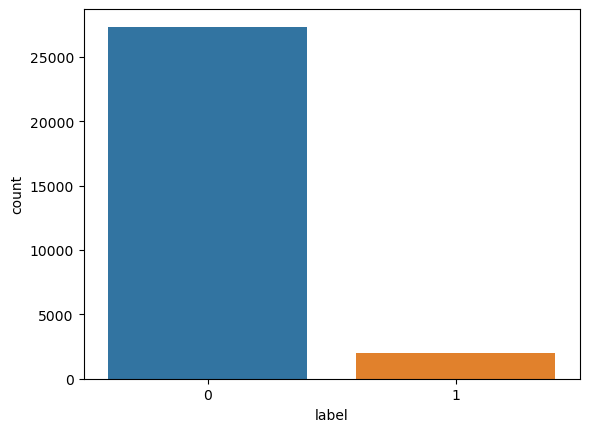

In [296]:
sns.countplot(tweet['label'])

In [297]:
non_hate = tweet[tweet.label==0]
non_hate.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [298]:
hate = tweet[tweet.label==1]
hate.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


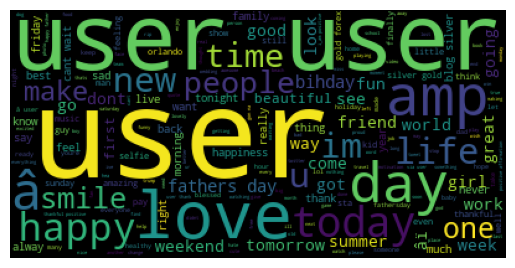

In [299]:
text = ' '.join([word for word in non_hate['tweet']])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

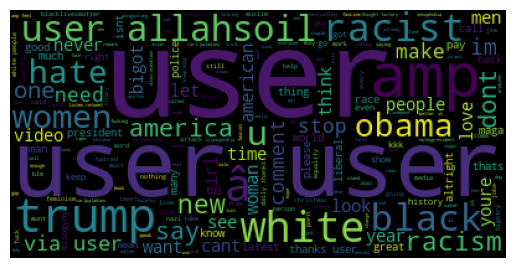

In [300]:
text = ' '.join([word for word in hate['tweet']])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [301]:
"""class TextSelector(BaseEstimator, TransformerMixin):
    """"""
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """"""
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
"""

'class TextSelector(BaseEstimator, TransformerMixin):\n    \n    Transformer to select a single column from the data frame to perform additional transformations on\n    Use on text columns in the data\n    \n    def __init__(self, key):\n        self.key = key\n\n    def fit(self, X, y=None):\n        return self\n\n    def transform(self, X):\n        return X[self.key]\n'

In [302]:
"""class NumberSelector(BaseEstimator, TransformerMixin):
    """"""
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """"""
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
"""

'class NumberSelector(BaseEstimator, TransformerMixin):\n    \n    Transformer to select a single column from the data frame to perform additional transformations on\n    Use on numeric columns in the data\n    \n    def __init__(self, key):\n        self.key = key\n\n    def fit(self, X, y=None):\n        return self\n\n    def transform(self, X):\n        return X[[self.key]]\n'

In [303]:
"""tweet = Pipeline([
                ('selector', TextSelector(key='Tweet')),
                ('tfidf', TfidfVectorizer( stop_words='english', max_features=1000))
            ])"""

"tweet = Pipeline([\n                ('selector', TextSelector(key='Tweet')),\n                ('tfidf', TfidfVectorizer( stop_words='english', max_features=1000))\n            ])"

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [305]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet['tweet'])

In [306]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:208579

First 20 features:
 ['0000001', '0000001 polluting', '00027', '00027 photooftheday', '001', '0035', '00h30', '01', '01 4995', '01 7900', '01 blog', '01 croatia', '01 may', '01 shopalyssas', '0115', '0115 8599968', '0161', '0161 manny', '019', '019 previous']


In [307]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet['tweet'])

In [308]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:380305

First 20 features:
 ['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '00h30', '01', '01 4995', '01 4995 rustic', '01 7900', '01 7900 shopalyssas', '01 blog', '01 blog silver', '01 croatia', '01 croatia happy', '01 may', '01 may actual']


### Building the model

In [309]:
X = tweet['tweet']
Y = tweet['label']
X = vect.transform(X)

In [310]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [311]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (23476, 380305)
Size of y_train: (23476,)
Size of x_test: (5869, 380305)
Size of y_test: (5869,)


### Logistic Regression

In [312]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_preds = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_preds, y_test)
print("Accuracy using Logistic Regression: ",np.mean(logreg_preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, logreg_preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, logreg_preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, logreg_preds, average="micro"))

Accuracy using Logistic Regression:  0.9316749020276026
Weighted F1 score:  0.9003457728875555
Macroavg F1 score:  0.506036259745864
Microavg F1 score:  0.9316749020276026


In [313]:
print(confusion_matrix(y_test, logreg_preds))
print("\n")
print(classification_report(y_test, logreg_preds))

[[5458    0]
 [ 401   10]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5458
           1       1.00      0.02      0.05       411

    accuracy                           0.93      5869
   macro avg       0.97      0.51      0.51      5869
weighted avg       0.94      0.93      0.90      5869



In [314]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [315]:
param_grid={'C':[100,10,1.0,0.1,0.01], 'solver':['newton-cg','lbfgs','liblinear']}
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best Cross Validation score: {:2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross Validation score: 0.952462
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [316]:
y_pred=grid.predict(x_test)

In [317]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 94.89%


In [318]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5450    8]
 [ 292  119]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.94      0.29      0.44       411

    accuracy                           0.95      5869
   macro avg       0.94      0.64      0.71      5869
weighted avg       0.95      0.95      0.94      5869



### Stochastic Gradient Descent

In [319]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_preds = sgd.predict(x_test)
print("Accuracy using Stochastic Gradient Descent: ",np.mean(sgd_preds == y_test))
print("Weighted F1 score: ", f1_score(y_test, sgd_preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, sgd_preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, sgd_preds, average="micro"))

Accuracy using Stochastic Gradient Descent:  0.9384903731470438
Weighted F1 score:  0.9158525746973701
Macroavg F1 score:  0.5958162475951198
Microavg F1 score:  0.9384903731470438


In [320]:
print(confusion_matrix(y_test, sgd_preds))
print("\n")
print(classification_report(y_test, sgd_preds))

[[5456    2]
 [ 359   52]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5458
           1       0.96      0.13      0.22       411

    accuracy                           0.94      5869
   macro avg       0.95      0.56      0.60      5869
weighted avg       0.94      0.94      0.92      5869



### Support Vector Classifier

In [321]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_preds = svc.predict(x_test)

print("Accuracy using Support Vector Classifier: ",np.mean(svc_preds == y_test)*100)
print("Weighted F1 score: ", f1_score(y_test, svc_preds, average="weighted"))
print("Macroavg F1 score: ", f1_score(y_test, svc_preds, average="macro"))
print("Microavg F1 score: ", f1_score(y_test, svc_preds, average="micro"))

Accuracy using Support Vector Classifier:  94.97359004941217
Weighted F1 score:  0.9371754984416473
Macroavg F1 score:  0.7131742646648315
Microavg F1 score:  0.9497359004941217


In [322]:
print(confusion_matrix(y_test, svc_preds))
print("\n")
print(classification_report(y_test, svc_preds))

[[5452    6]
 [ 289  122]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.95      0.30      0.45       411

    accuracy                           0.95      5869
   macro avg       0.95      0.65      0.71      5869
weighted avg       0.95      0.95      0.94      5869

